<a href="https://colab.research.google.com/github/sanalpillai/ML-Data-Cleaning-and-Feature-Selection/blob/main/ML_Data_Cleaning_and_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install eli5

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [3]:
# Reading the dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/sanalpillai/ML-Data-Cleaning-and-Feature-Selection/main/Dataset/cirrhosis.csv"
)

In [4]:
data.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

**1. What are the data types? (Only numeric and categorical)**

Following are the datatypes:

**Numeric:**
- `ID`: int64
- `N_Days`: int64
- `Age`: int64
- `Bilirubin`: float64
- `Cholesterol`: float64
- `Albumin`: float64
- `Copper`: float64
- `Alk_Phos`: float64
- `SGOT`: float64
- `Tryglicerides`: float64
- `Platelets`: float64
- `Prothrombin`: float64
- `Stage`: float64

**Categorical:**
- `Status`: object
- `Drug`: object
- `Sex`: object
- `Ascites`: object
- `Hepatomegaly`: object
- `Spiders`: object
- `Edema`: object

In [5]:
# Viewing data in the file
data.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [6]:
# checking if the any data is missing
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

**2. Are there missing values?**

Yes, there are missing values in the dataset in multiple columns.


**5. Which independent variables have missing data? How much?**

The variables with missing data along with the count of missing values are as follows:

- `Drug`: 106 missing values
- `Ascites`: 106 missing values
- `Hepatomegaly`: 106 missing values
- `Spiders`: 106 missing values
- `Cholesterol`: 134 missing values
- `Copper`: 108 missing values
- `Alk_Phos`: 106 missing values
- `SGOT`: 106 missing values
- `Tryglicerides`: 136 missing values
- `Platelets`: 11 missing values
- `Prothrombin`: 2 missing values
- `Stage`: 6 missing values

All other variables do not have missing values.

In [7]:
# Replacing categorical data with mode
for column in ['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Stage']:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Replacing numerical data with mean or median
for column in ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']:
    # Check if the distribution is skewed
    if data[column].skew() > 1 or data[column].skew() < -1:
        median_value = data[column].median()
        data[column].fillna(median_value, inplace=True)
    else:
        mean_value = data[column].mean()
        data[column].fillna(mean_value, inplace=True)

data.to_csv('cleaned_data_cirrhosis.csv', index=False)

In [8]:
# Reading the cleaned dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/sanalpillai/ML-Data-Cleaning-and-Feature-Selection/main/Dataset/cleaned_data_cirrhosis.csv"
)

In [9]:
# Replace 'CL' with 'C' in the 'Status' column
data['Status'] = data['Status'].replace({'CL': 'C'})
data['Edema'] = data['Edema'].replace({'S': 'Y'})

In [10]:
# Viewing data
data.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504      C          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     Y        1.4        176.0     3.48   210.0     516.0   96.10   
3     Y        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [11]:
# checking if the any data is missing
data.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

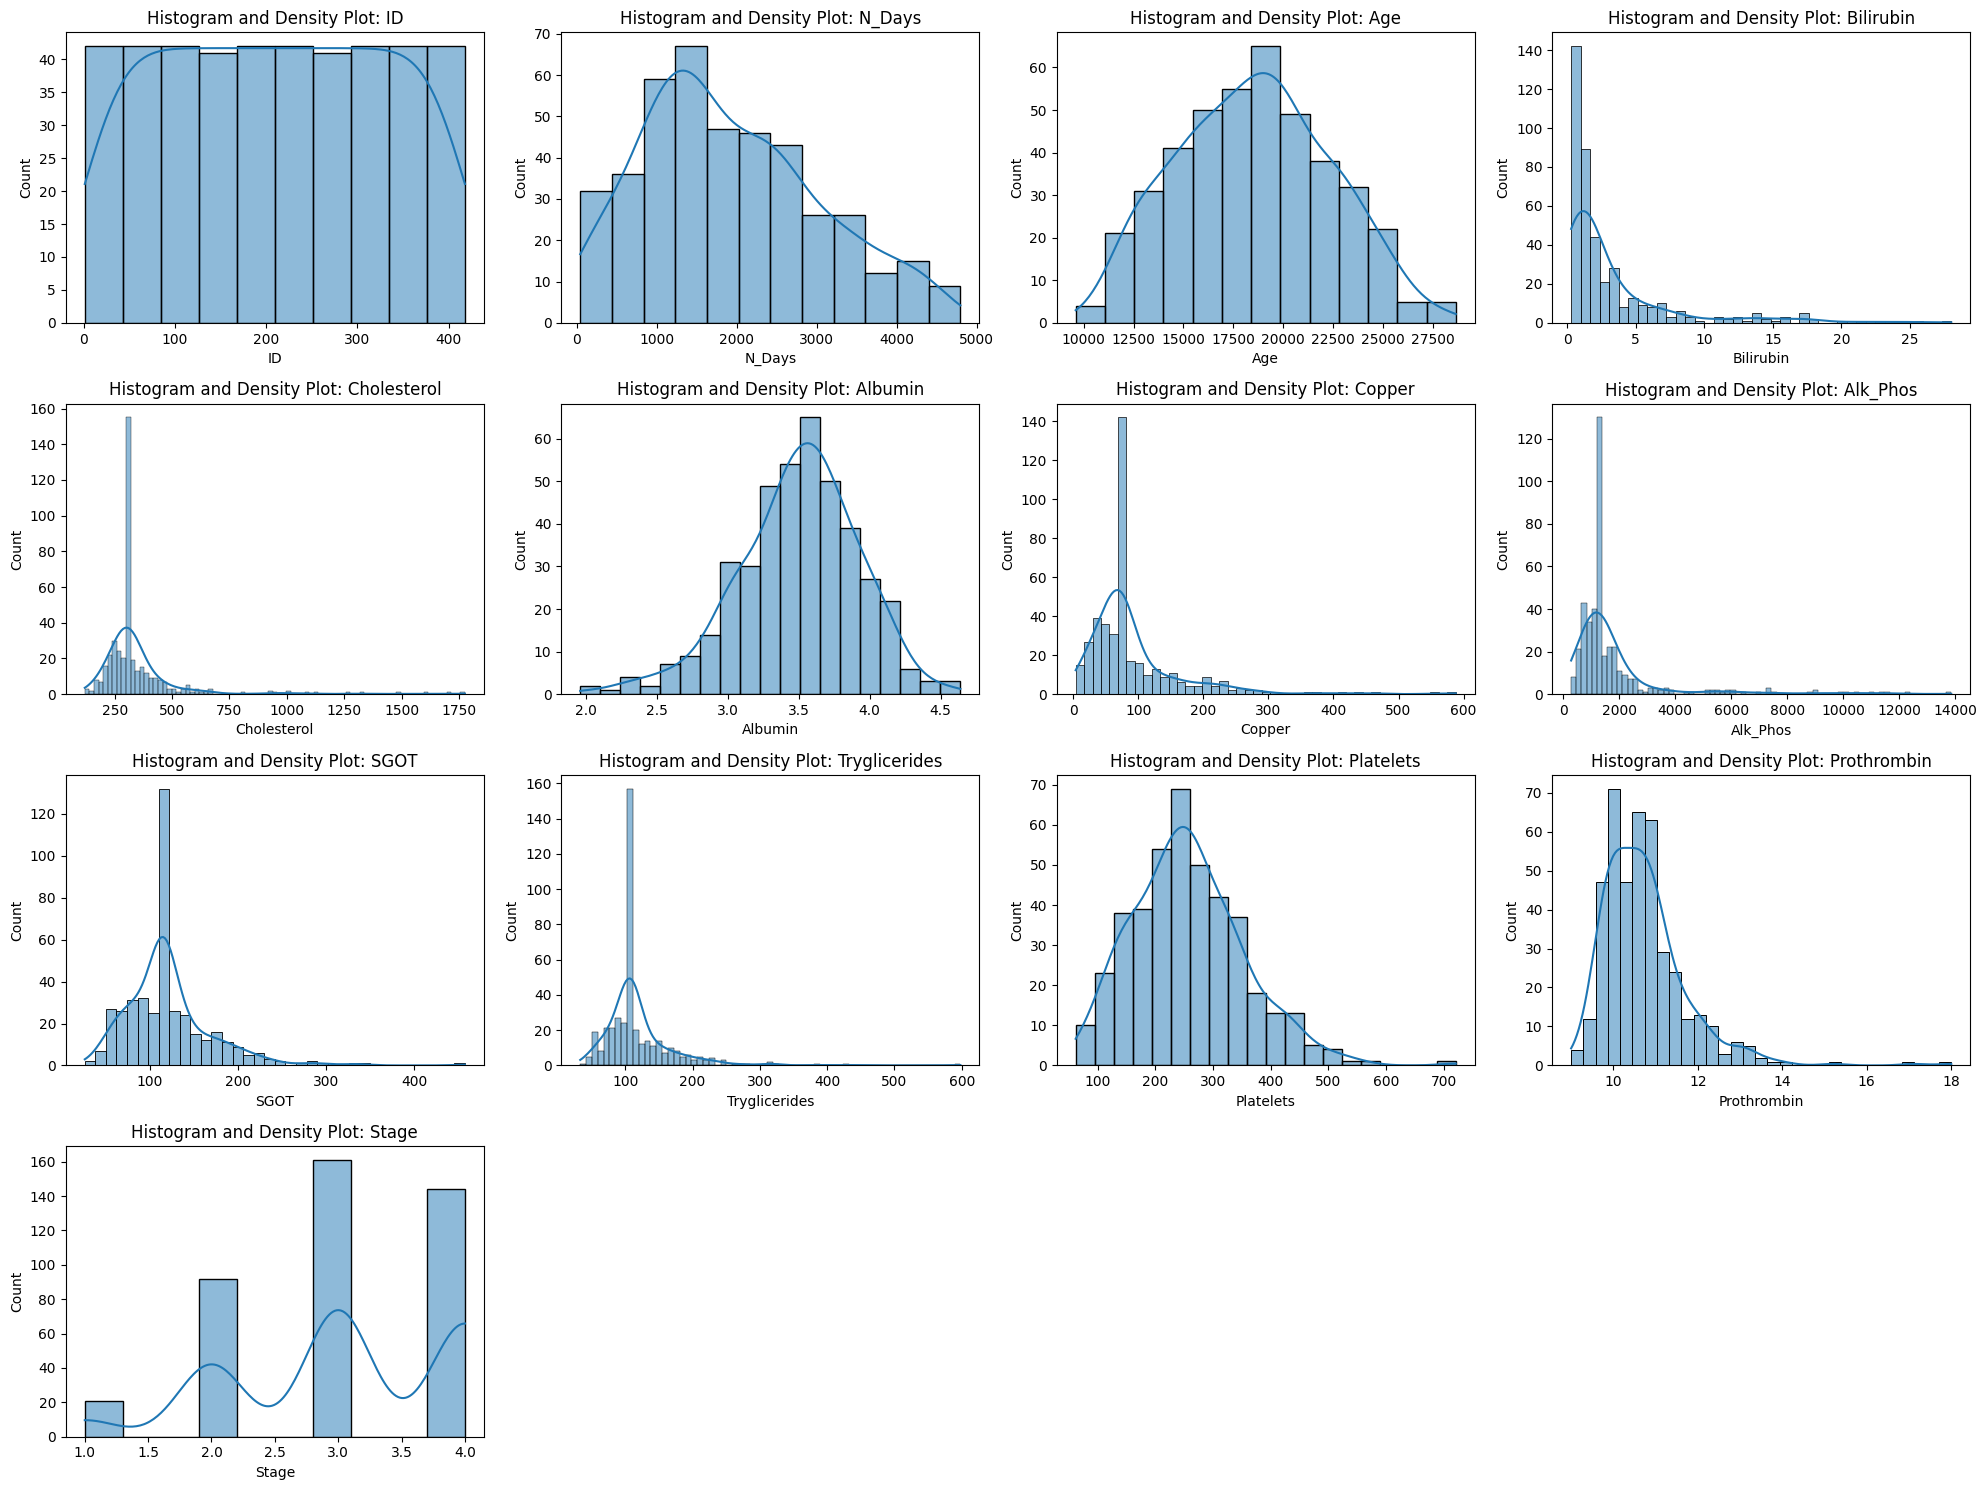

In [12]:
# Plotting histograms and density plots for all numeric variables

# Filtering out the numeric variables for the density plot
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Setting up the matplotlib figure
plt.figure(figsize=(20, 15))

# Enumerating through the numeric columns and plotting histograms and density plots
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Histogram and Density Plot: {column}')

plt.tight_layout()  # Adjusts plot to ensure it fits into the figure area
plt.show()  # Displays the plot


<Figure size 800x500 with 0 Axes>

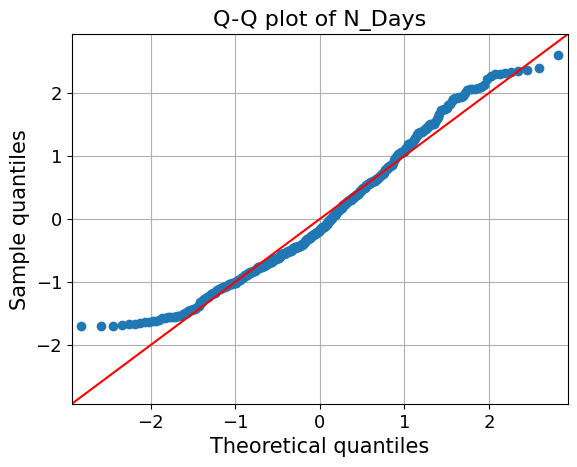

<Figure size 800x500 with 0 Axes>

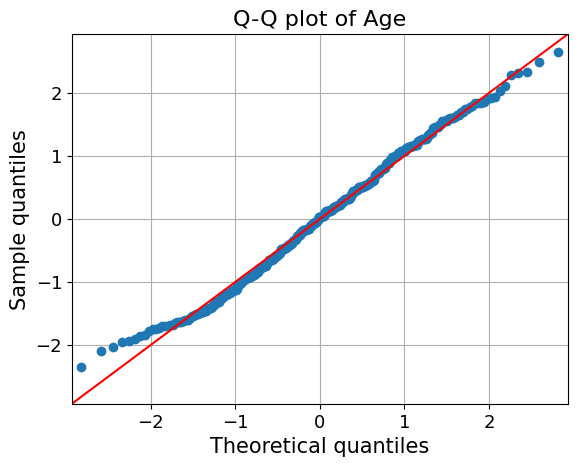

<Figure size 800x500 with 0 Axes>

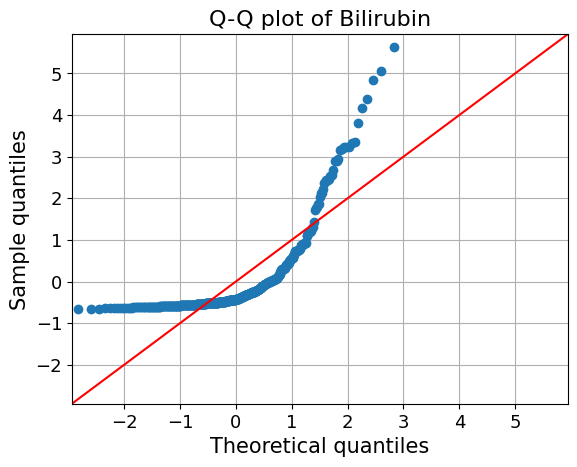

<Figure size 800x500 with 0 Axes>

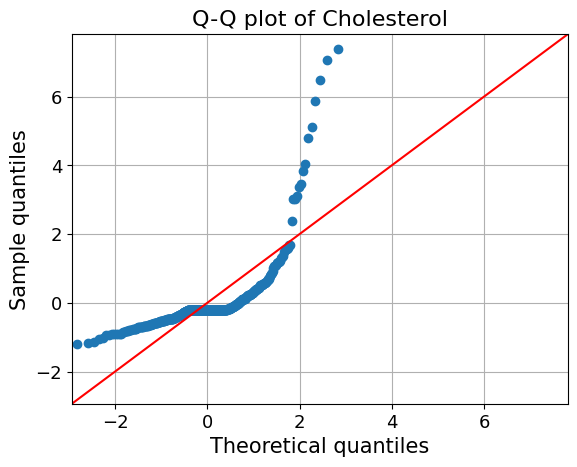

<Figure size 800x500 with 0 Axes>

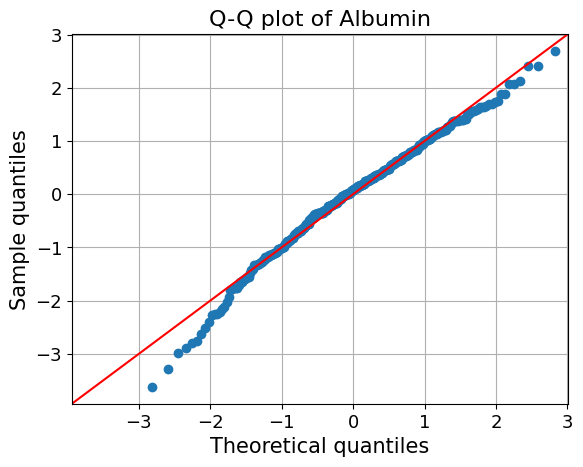

<Figure size 800x500 with 0 Axes>

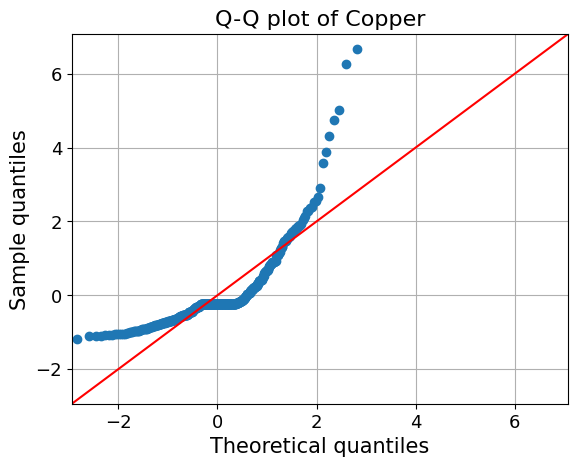

<Figure size 800x500 with 0 Axes>

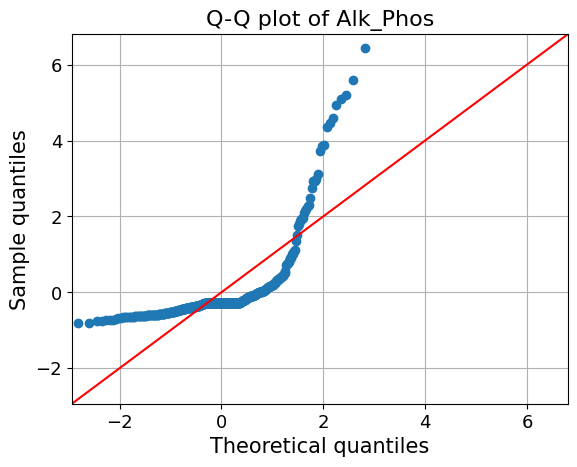

<Figure size 800x500 with 0 Axes>

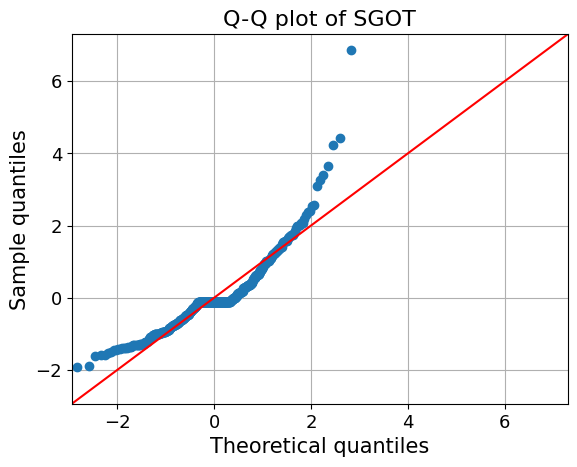

<Figure size 800x500 with 0 Axes>

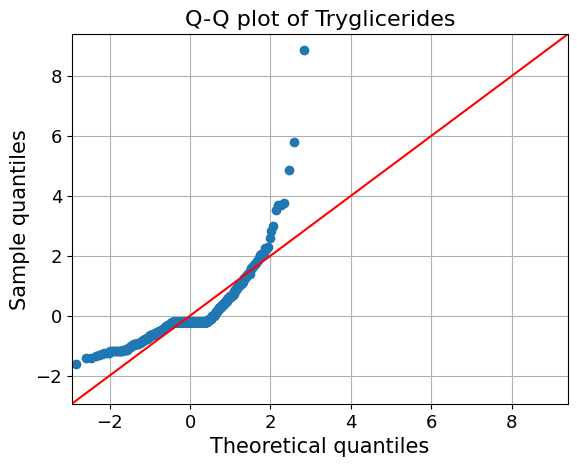

<Figure size 800x500 with 0 Axes>

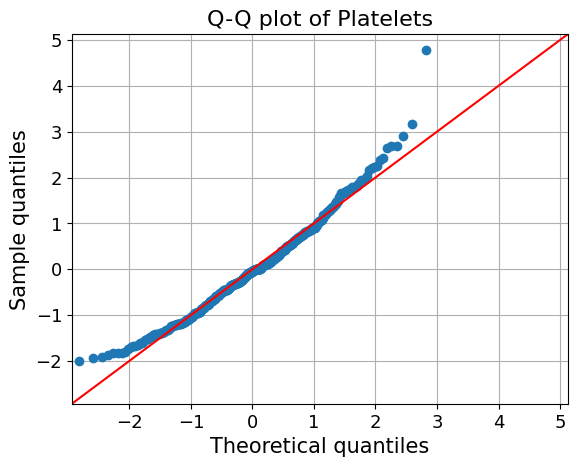

<Figure size 800x500 with 0 Axes>

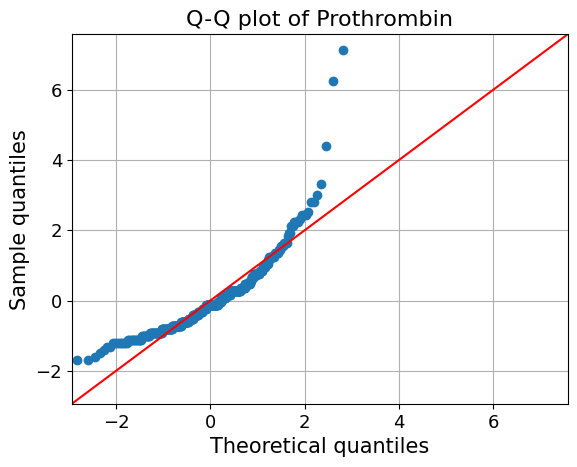

In [13]:
from statsmodels.graphics.gofplots import qqplot

# List of independent numerical variables
numerical_vars = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
                  'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Generate Q-Q plots for each numerical variable
for var in numerical_vars:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data[var], line='45', fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel('Theoretical quantiles', fontsize=15)
    plt.ylabel('Sample quantiles', fontsize=15)
    plt.title(f'Q-Q plot of {var}', fontsize=16)
    plt.grid(True)
    plt.show()


**3. What are the likely distributions of the numeric variables?**

Based on the Q-Q plots and histogram density plots, here are the likely distributions of the numeric variables:

1. **Prothrombin**:
   - Q-Q Plot: Shows a right-skewed distribution with a pronounced deviation from the theoretical line at higher quantiles, indicating the presence of outliers or extreme values.
   - Histogram: The distribution appears right-skewed, which is confirmed by the Q-Q plot.

2. **N_Days**:
   - Histogram: Right-skewed distribution with a long tail towards higher values.
   - Q-Q Plot: Also suggests right-skewness with deviations at both tails, more pronounced on the right.

3. **Age**:
   - Histogram: Shows a somewhat symmetric distribution with a slight right skew.
   - Q-Q Plot: Deviations at both tails suggest that while the central part of the distribution is close to normal, there are outliers or extreme values.

4. **Bilirubin**:
   - Histogram: Highly right-skewed with many values clustered at the lower end and some extreme higher values.
   - Q-Q Plot: Significant deviation from the line, confirming right-skewness.

5. **Cholesterol**:
   - Histogram: Right-skewed distribution with a tail of high values.
   - Q-Q Plot: Clear deviation from the theoretical line in the upper quantiles, indicating a right-skewed distribution.

6. **Albumin**:
   - Histogram: Appears to have a more symmetric distribution, possibly normal.
   - Q-Q Plot: Deviations at the lower tail suggest a slight skew or outliers.

7. **Copper**:
   - Histogram: Right-skewed with a long tail of higher values.
   - Q-Q Plot: Pronounced deviation from the line, especially at higher quantiles, suggesting a right-skewed distribution.

8. **Alk_Phos**:
   - Histogram: Right-skewed distribution.
   - Q-Q Plot: Similar to Copper, with a right-skewed distribution indicated by the deviation from the theoretical line.

9. **SGOT**:
    - Histogram: Appears right-skewed with a tail of high values.
    - Q-Q Plot: Deviations from the straight line at higher quantiles confirm the right-skewness.

10. **Tryglicerides**:
    - Histogram: Right-skewed distribution.
    - Q-Q Plot: The plot shows a right-skewed distribution with several outliers.

11. **Platelets**:
    - Histogram: The distribution seems somewhat normal but with a slight right skew.
    - Q-Q Plot: Suggests that the data is not perfectly normal, with deviations at the upper end.

In summary, most of the numeric variables in the dataset appear to be right-skewed, which is common in clinical and biological data. The albumin distribution seems to be the most normal but still shows slight deviations. The stage variable is clearly not continuous and represents ordered categories.

<Axes: >

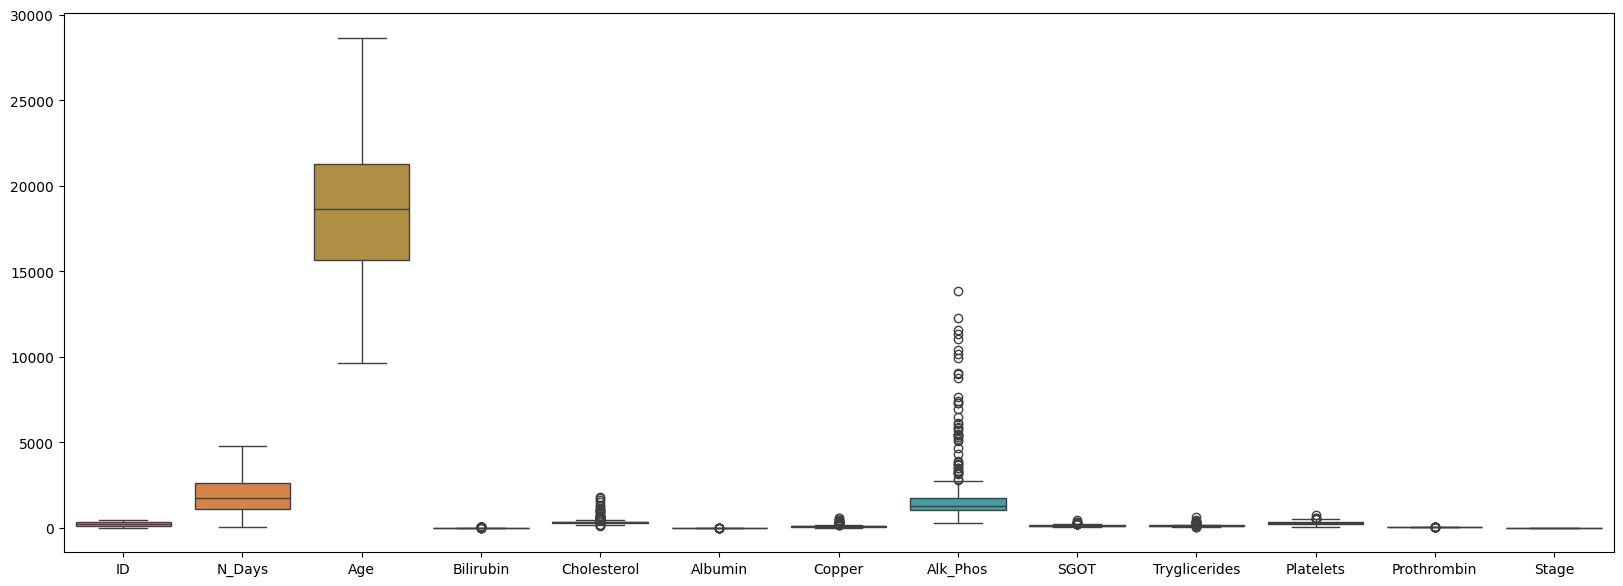

In [14]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20, 7))
sns.boxplot(data=data)

In [15]:
print(data.columns)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


In [16]:
#Making categories to 0 & 1
data["Status"] = data["Status"].map({"D": 0, "C": 1})
data["Drug"] = data["Drug"].map({"D-penicillamine": 0, "Placebo": 1})
data["Sex"] = data["Sex"].map({"F": 0, "M": 1})
data["Ascites"] = data["Ascites"].map({"N": 0, "Y": 1})
data["Hepatomegaly"] = data["Hepatomegaly"].map({"N": 0, "Y": 1})
data["Spiders"] = data["Spiders"].map({"N": 0, "Y": 1})
data["Edema"] = data["Edema"].map({"N": 0, "Y": 1})
# Viewing data
data.head()

ID  N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  \
0   1     400       0     0  21464    0        1             1        1   
1   2    4500       1     0  20617    0        0             1        1   
2   3    1012       0     0  25594    1        0             0        0   
3   4    1925       0     0  19994    0        0             1        1   
4   5    1504       1     1  13918    0        0             1        1   

   Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0      1       14.5        261.0     2.60   156.0    1718.0  137.95   
1      0        1.1        302.0     4.14    54.0    7394.8  113.52   
2      1        1.4        176.0     3.48   210.0     516.0   96.10   
3      1        1.8        244.0     2.54    64.0    6121.8   60.63   
4      0        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [17]:
# Creating binary vaiables

data = pd.get_dummies(data)

# Normalizing the data in the columns

from sklearn import preprocessing

# Create variables to store scaled values as floats
a = data[["N_Days"]].values.astype(float)
b = data[["Age"]].values.astype(float)
c = data[["Bilirubin"]].values.astype(float)
d = data[["Cholesterol"]].values.astype(float)
e = data[["Albumin"]].values.astype(float)
f = data[["Copper"]].values.astype(float)
g = data[["Alk_Phos"]].values.astype(float)
h = data[["SGOT"]].values.astype(float)
i = data[["Tryglicerides"]].values.astype(float)
j = data[["Platelets"]].values.astype(float)
k = data[["Prothrombin"]].values.astype(float)
l = data[["Stage"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
a_scaled = min_max_scaler.fit_transform(a)
b_scaled = min_max_scaler.fit_transform(b)
c_scaled = min_max_scaler.fit_transform(c)
d_scaled = min_max_scaler.fit_transform(d)
e_scaled = min_max_scaler.fit_transform(e)
f_scaled = min_max_scaler.fit_transform(f)
g_scaled = min_max_scaler.fit_transform(g)
h_scaled = min_max_scaler.fit_transform(h)
i_scaled = min_max_scaler.fit_transform(i)
j_scaled = min_max_scaler.fit_transform(j)
k_scaled = min_max_scaler.fit_transform(k)
l_scaled = min_max_scaler.fit_transform(l)

# Run the normalizer on the dataframe
data[["N_Days"]] = pd.DataFrame(a_scaled)
data[["Age"]] = pd.DataFrame(b_scaled)
data[["Bilirubin"]] = pd.DataFrame(c_scaled)
data[["Cholesterol"]] = pd.DataFrame(d_scaled)
data[["Albumin"]] = pd.DataFrame(e_scaled)
data[["Copper"]] = pd.DataFrame(f_scaled)
data[["Alk_Phos"]] = pd.DataFrame(g_scaled)
data[["SGOT"]] = pd.DataFrame(h_scaled)
data[["Tryglicerides"]] = pd.DataFrame(i_scaled)
data[["Platelets"]] = pd.DataFrame(j_scaled)
data[["Prothrombin"]] = pd.DataFrame(k_scaled)
data[["Stage"]] = pd.DataFrame(l_scaled)

In [18]:
# data after nromalizing and feature creation
data.head()

ID    N_Days  Status  Drug       Age  Sex  Ascites  Hepatomegaly  Spiders  \
0   1  0.075515       0     0  0.622822    0        1             1        1   
1   2  0.937947       1     0  0.578364    0        0             1        1   
2   3  0.204249       0     0  0.839597    1        0             0        0   
3   4  0.396298       0     0  0.545664    0        0             1        1   
4   5  0.307741       1     1  0.226748    0        0             1        1   

   Edema  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0      1   0.512635     0.085196  0.238806  0.260274  0.105279  0.258993   
1      0   0.028881     0.109970  0.813433  0.085616  0.523509  0.202298   
2      1   0.039711     0.033837  0.567164  0.352740  0.016724  0.161871   
3      1   0.054152     0.074924  0.216418  0.102740  0.429723  0.079554   
4      0   0.111913     0.096073  0.585821  0.238014  0.028143  0.201439   

   Tryglicerides  Platelets  Prothrombin     Stage  
0       0.246018   0.194234     0.355556  1.000000  
1       0.097345   0.241275     0.177778  0.666667  
2       0.038938   0.135053     0.333333  1.000000  
3       0.104425   0.183612     0.144444  1.000000  
4       0.069027   0.112291     0.211111  0.666667

In [19]:
#Univariate Selection
from sklearn.feature_selection import SelectKBest, f_classif

X = data.drop(['Status'], axis=1)  # Assuming 'Status' is the target variable
y = data['Status']
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  # print 10 best features


          Specs      Score
9     Bilirubin  87.471756
1        N_Days  73.716540
17  Prothrombin  59.715486
12       Copper  46.445683
18        Stage  40.762593
0            ID  40.361510
5       Ascites  38.397713
8         Edema  34.792462
11      Albumin  28.990193
14         SGOT  26.946769


<Axes: >

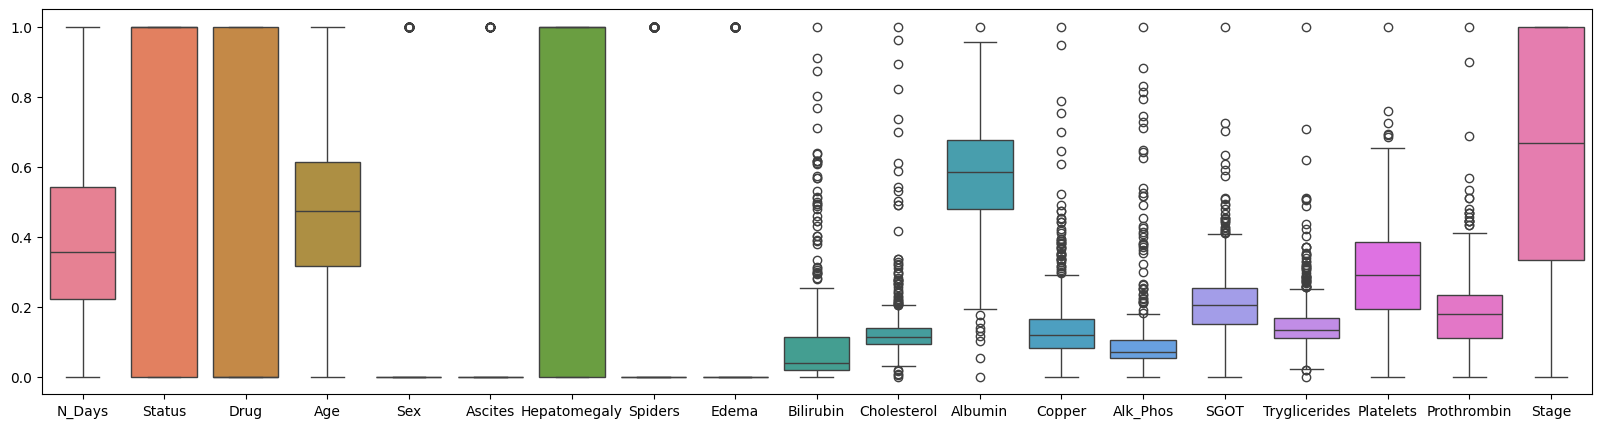

In [21]:
# Excluding 'ID' column from the data to be plotted
data = data.drop('ID', axis=1)

# Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20, 5))
sns.boxplot(data=data)

In [22]:
# checking the correlation between all the features in the data
data.corr()

N_Days    Status      Drug       Age       Sex   Ascites  \
N_Days         1.000000  0.387981  0.054742 -0.125934 -0.007386 -0.247090   
Status         0.387981  1.000000 -0.006973 -0.241145 -0.112976 -0.290693   
Drug           0.054742 -0.006973  1.000000 -0.158028 -0.019563  0.024685   
Age           -0.125934 -0.241145 -0.158028  1.000000  0.163341  0.183588   
Sex           -0.007386 -0.112976 -0.019563  0.163341  1.000000  0.015873   
Ascites       -0.247090 -0.290693  0.024685  0.183588  0.015873  1.000000   
Hepatomegaly  -0.287832 -0.220186 -0.113408  0.111522  0.016205  0.079680   
Spiders       -0.180715 -0.207329  0.142884 -0.078040 -0.103809  0.195960   
Edema         -0.271732 -0.277814 -0.007974  0.199729  0.027345  0.409107   
Bilirubin     -0.403953 -0.416818  0.074236  0.002362 -0.027652  0.334283   
Cholesterol   -0.099322 -0.141412  0.076928 -0.145054  0.002405 -0.038174   
Albumin        0.430829  0.255241  0.047487 -0.182350  0.030351 -0.315648   
Copper        -0.295723 -0.316915  0.063790  0.034519  0.222314  0.235302   
Alk_Phos       0.152368 -0.209875  0.058669 -0.060708  0.038026  0.034538   
SGOT          -0.187930 -0.246648  0.068560 -0.139050  0.000706  0.101112   
Tryglicerides -0.111453 -0.169090  0.067222  0.002323  0.056923  0.197834   
Platelets      0.147495  0.114289  0.063630 -0.145948 -0.089539 -0.167735   
Prothrombin   -0.110685 -0.354299  0.051674  0.113916  0.070666  0.268142   
Stage         -0.362013 -0.298735  0.058495  0.187852  0.017356  0.216645   

               Hepatomegaly   Spiders     Edema  Bilirubin  Cholesterol  \
N_Days            -0.287832 -0.180715 -0.271732  -0.403953    -0.099322   
Status            -0.220186 -0.207329 -0.277814  -0.416818    -0.141412   
Drug              -0.113408  0.142884 -0.007974   0.074236     0.076928   
Age                0.111522 -0.078040  0.199729   0.002362    -0.145054   
Sex                0.016205 -0.103809  0.027345  -0.027652     0.002405   
Ascites            0.079680  0.195960  0.409107   0.334283    -0.038174   
Hepatomegaly       1.000000  0.117692  0.128065   0.234372     0.064480   
Spiders            0.117692  1.000000  0.213679   0.247932     0.093853   
Edema              0.128065  0.213679  1.000000   0.282617    -0.083280   
Bilirubin          0.234372  0.247932  0.282617   1.000000     0.336882   
Cholesterol        0.064480  0.093853 -0.083280   0.336882     1.000000   
Albumin           -0.269351 -0.162071 -0.275728  -0.314177    -0.043022   
Copper             0.144227  0.288117  0.187719   0.403761     0.145910   
Alk_Phos           0.023482  0.086869  0.026758   0.104675     0.157995   
SGOT               0.091103  0.145465  0.099966   0.392112     0.347222   
Tryglicerides      0.083989  0.122999  0.093510   0.370330     0.291750   
Platelets         -0.181538 -0.103079 -0.184942  -0.013347     0.158641   
Prothrombin        0.147127  0.196611  0.289721   0.312007    -0.027259   
Stage              0.356155  0.245199  0.231441   0.200314     0.009930   

                Albumin    Copper  Alk_Phos      SGOT  Tryglicerides  \
N_Days         0.430829 -0.295723  0.152368 -0.187930      -0.111453   
Status         0.255241 -0.316915 -0.209875 -0.246648      -0.169090   
Drug           0.047487  0.063790  0.058669  0.068560       0.067222   
Age           -0.182350  0.034519 -0.060708 -0.139050       0.002323   
Sex            0.030351  0.222314  0.038026  0.000706       0.056923   
Ascites       -0.315648  0.235302  0.034538  0.101112       0.197834   
Hepatomegaly  -0.269351  0.144227  0.023482  0.091103       0.083989   
Spiders       -0.162071  0.288117  0.086869  0.145465       0.122999   
Edema         -0.275728  0.187719  0.026758  0.099966       0.093510   
Bilirubin     -0.314177  0.403761  0.104675  0.392112       0.370330   
Cholesterol   -0.043022  0.145910  0.157995  0.347222       0.291750   
Albumin        1.000000 -0.209024 -0.070010 -0.180947      -0.068509   
Copper        -0.209024  1.000000  0.20

<Axes: >

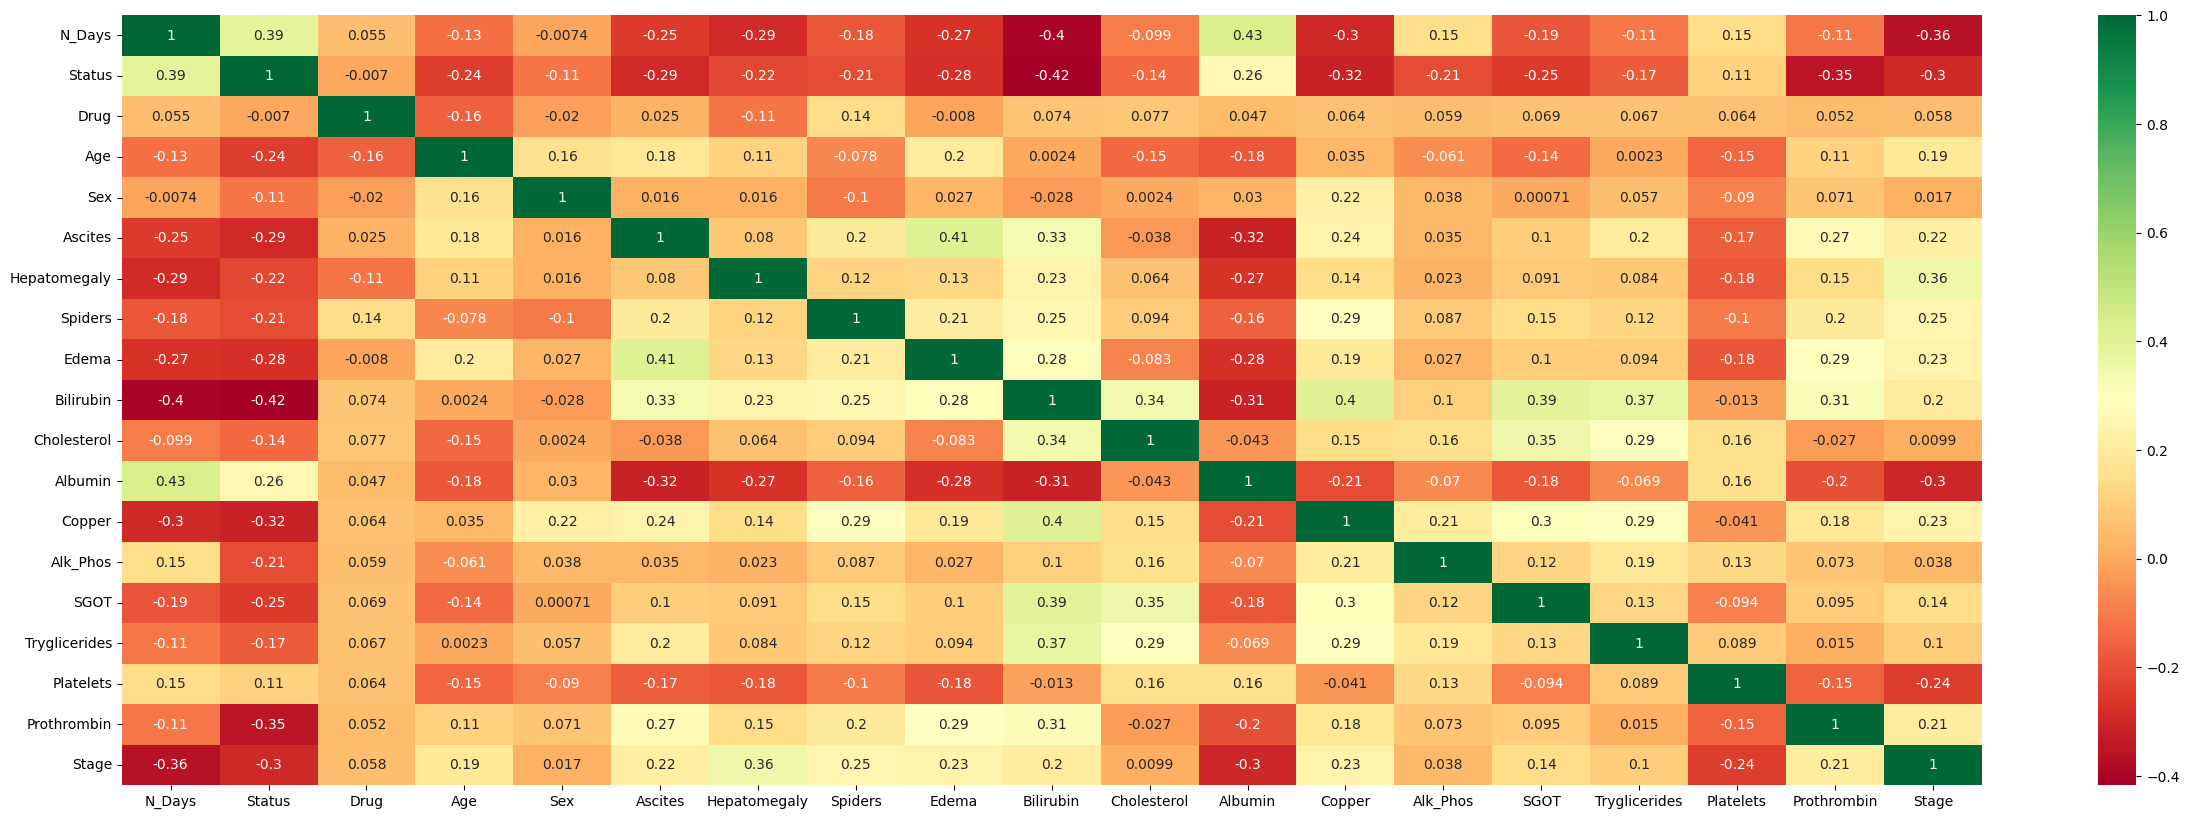

In [23]:
# the heat map of the correlation
plt.figure(figsize=(30, 10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

**7. Is the predictor variables independent of all the other predictor variables?**

In the correlation matrix, if the predictor variables were entirely independent of each other, we would expect to see correlation coefficients close to 0, indicating no linear association. However, in practice, especially with complex datasets, it is common to observe some degree of correlation between predictors.

Looking at the provided correlation matrix heatmap, we can see varying degrees of correlation between different predictor variables. Here are some key observations:



*   Certain variables, such as 'Albumin' and 'Bilirubin', show substantial negative correlations with the target variable 'Status', which indicates that they are not independent of the target.
*   Other pairs of predictor variables exhibit non-zero correlations. For example, 'Albumin' shows a positive correlation with 'N_Days' and a negative correlation with 'Bilirubin'.
*   Some variables, like 'Age', 'Sex', and 'Cholesterol', have low correlation coefficients with most other predictors, suggesting a higher degree of independence.

In conclusion, while some predictor variables show a degree of correlation with one another, it is not so strong as to suggest multicollinearity concerns in every case. It is important to consider these correlations when building predictive models, as highly correlated predictors can impact model performance and interpretation

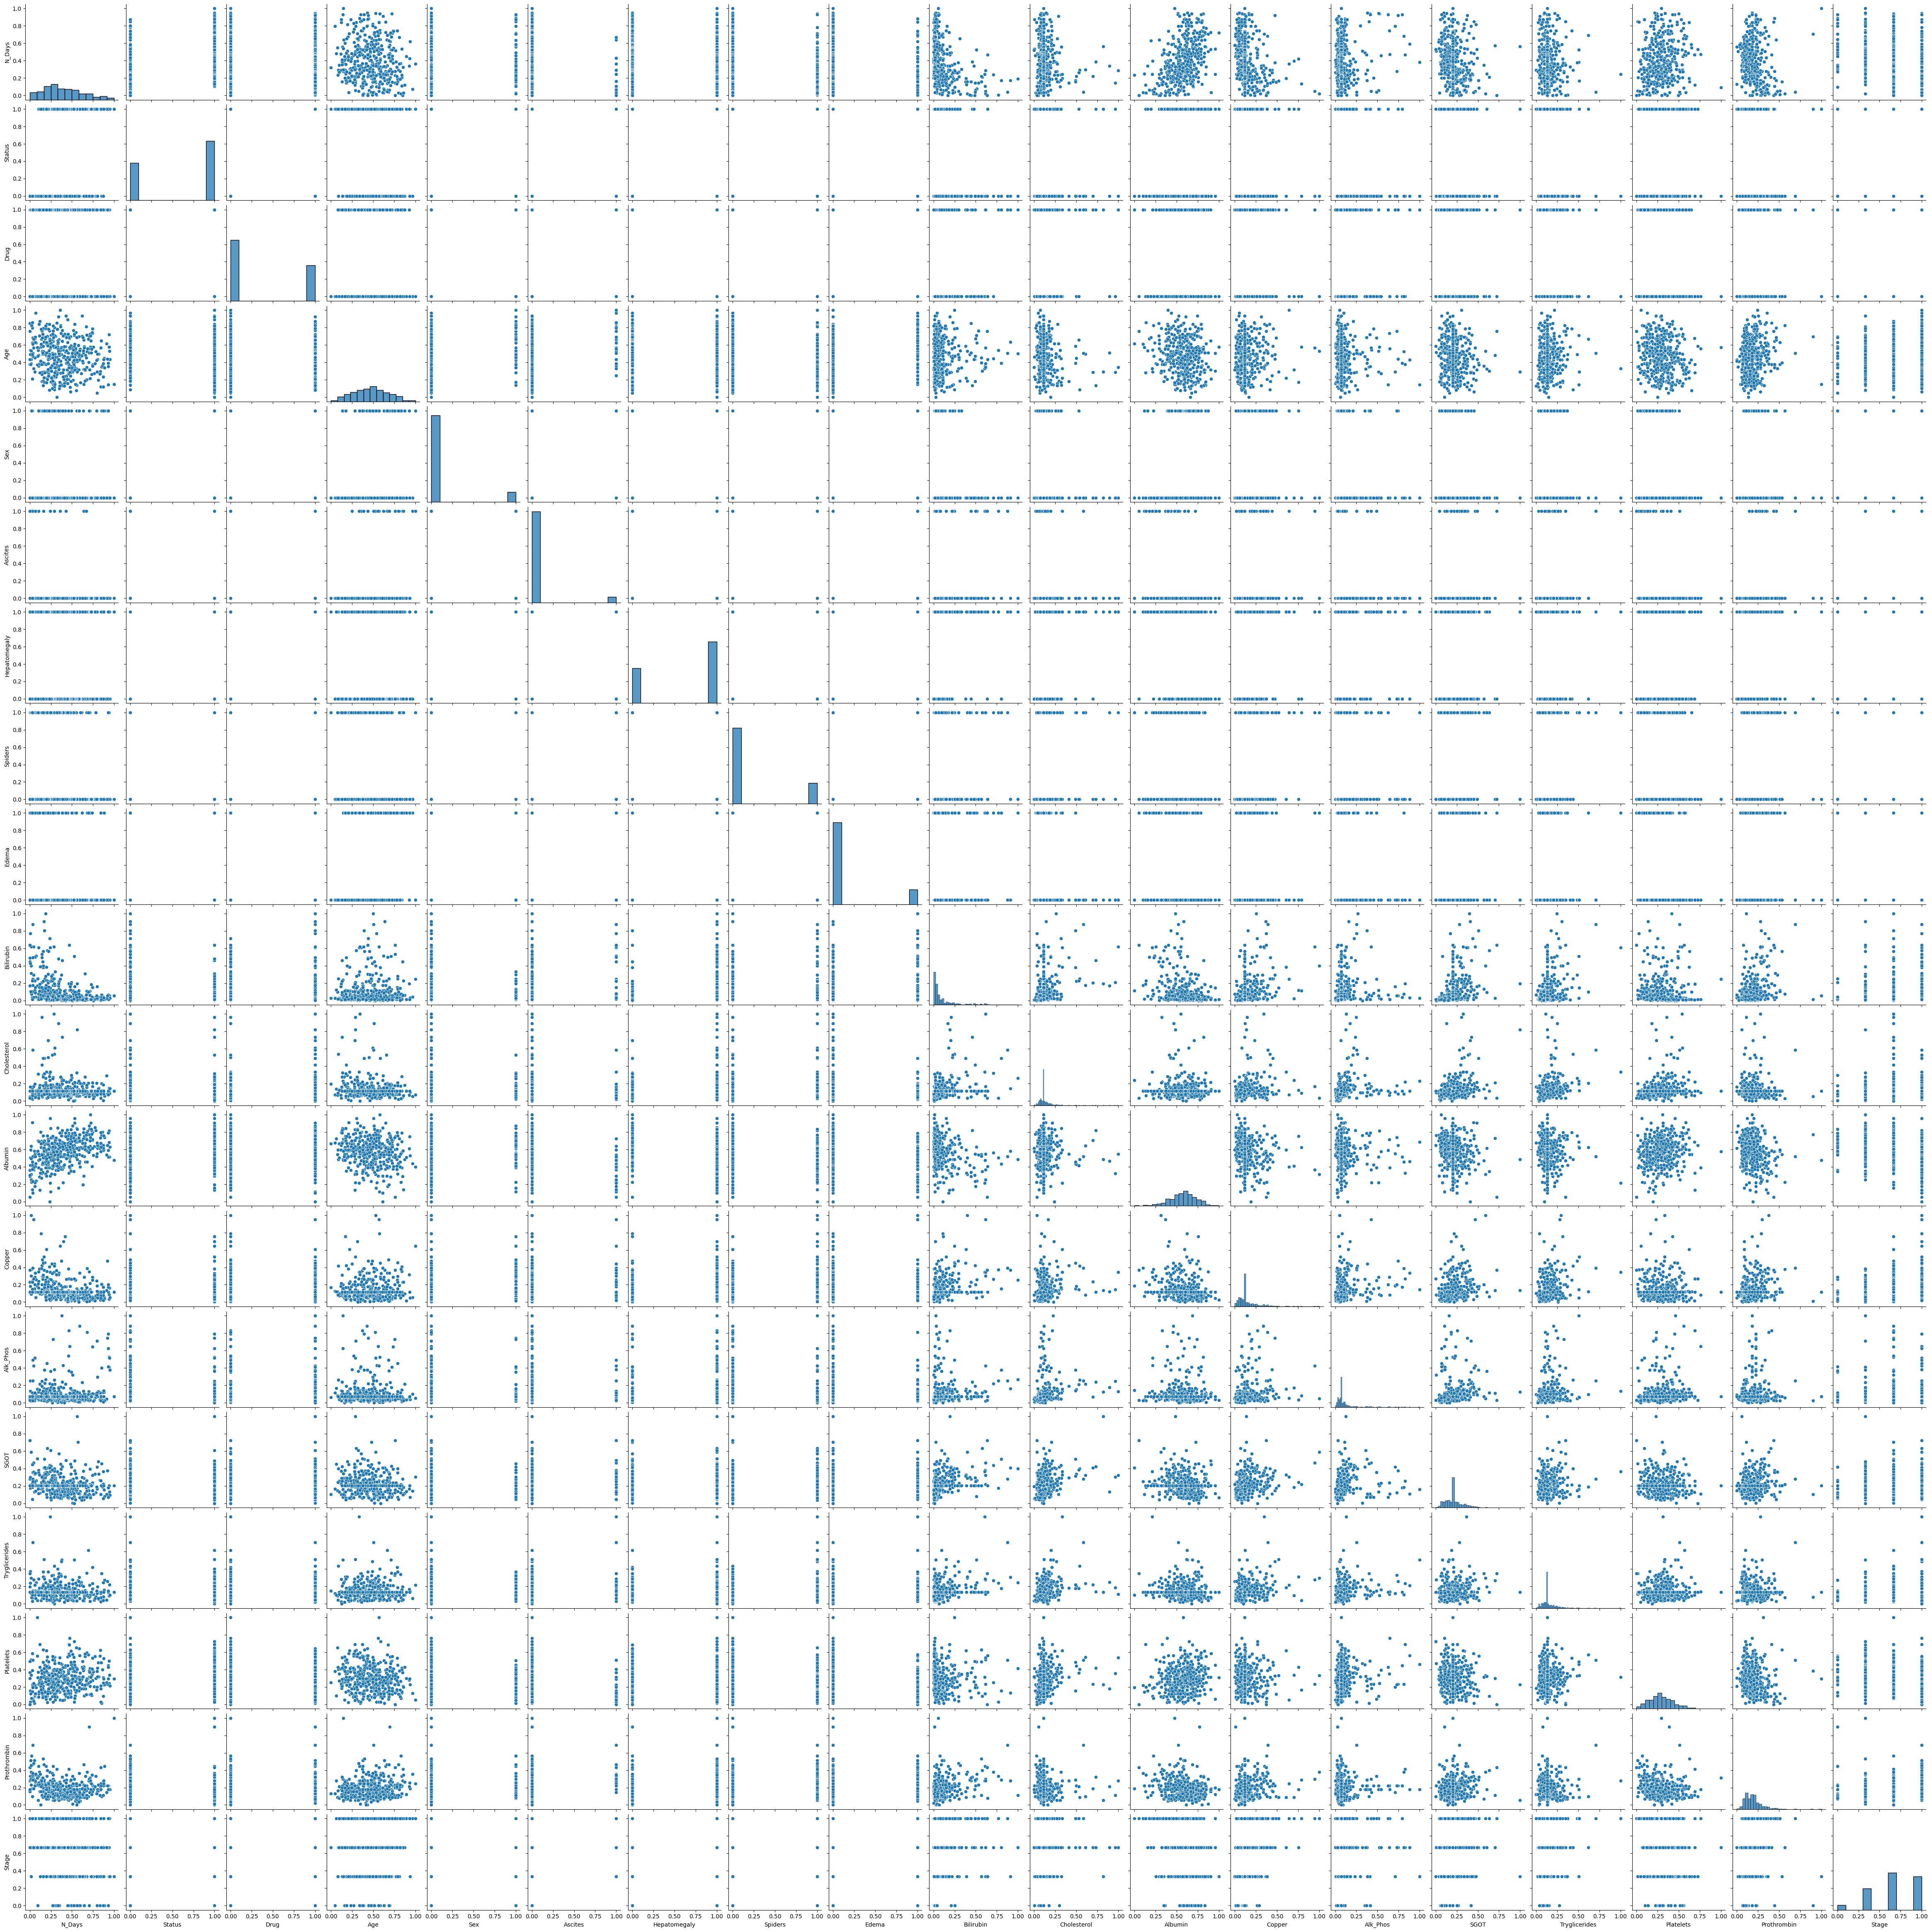

In [25]:
# pair plot to check the colinearity
sns.pairplot(data)

In [26]:
import statsmodels.api as sm

targets = ['Status']
features = [
    'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Sex', 'Ascites',
    'Hepatomegaly', 'Spiders', 'Edema'
]

for target in targets:
    model = sm.OLS(data[target], data[features]).fit()
    print(f"Model Summary for {target}:")
    print(model.summary())
    print("\n\n")


Model Summary for Status:
                                 OLS Regression Results                                
Dep. Variable:                 Status   R-squared (uncentered):                   0.693
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              65.14
Date:                Mon, 29 Jan 2024   Prob (F-statistic):                    2.98e-94
Time:                        16:06:24   Log-Likelihood:                         -244.66
No. Observations:                 418   AIC:                                      517.3
Df Residuals:                     404   BIC:                                      573.8
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
------------

In [27]:
from sklearn.model_selection import train_test_split

X = data[
    [
        'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Sex', 'Ascites',
    'Hepatomegaly', 'Spiders', 'Edema',
    ]
]

y = data["Status"]

# Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_t, y_t, test_size=0.15, random_state=1
)

Feature ranking:
1. Feature: Bilirubin (0.212073)
2. Feature: Age (0.129283)
3. Feature: Copper (0.128021)
4. Feature: Albumin (0.112661)
5. Feature: Platelets (0.084984)
6. Feature: SGOT (0.079188)
7. Feature: Alk_Phos (0.070943)
8. Feature: Cholesterol (0.054375)
9. Feature: Tryglicerides (0.046164)
10. Feature: Hepatomegaly (0.024594)
11. Feature: Edema (0.019686)
12. Feature: Ascites (0.018509)
13. Feature: Spiders (0.010365)
14. Feature: Sex (0.009153)


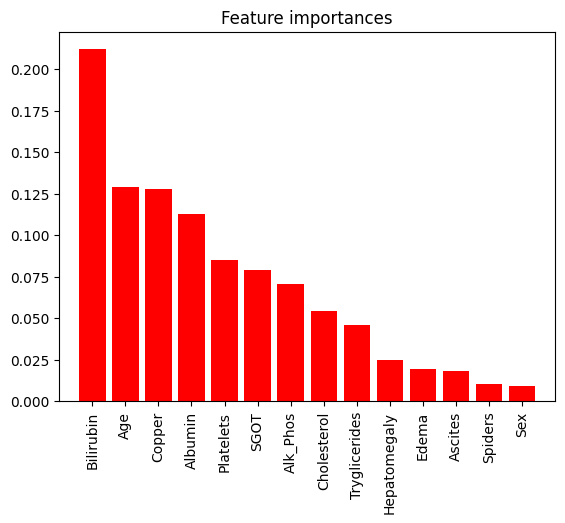

In [36]:
#Random Forest
# Assuming X has column names
feature_names = X.columns

# Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. Feature: %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


**4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**


Based on the output from three feature selection methods used in our analysis, the following independent variables are identified as useful in predicting the target variable:

1. Feature Importance from Random Forest:

Bilirubin: With the highest feature importance score, bilirubin is the most significant predictor according to the Random Forest model. Its high score suggests a strong relationship with the target variable.
Albumin and Age: These features follow bilirubin in importance, indicating their relevance in the model.

2. Correlation Matrix:

Albumin and Bilirubin: These variables show significant correlation with the target variable, corroborating the findings from the Random Forest model.
Platelets and SGOT: These features also show considerable correlation with the target variable, suggesting their potential predictive power.

3. Univariate Selection (SelectKBest):

Bilirubin, N_Days, and Prothrombin: These variables have the highest scores from univariate feature selection, indicating they are statistically significant predictors of the target variable.
Copper and Stage: They also score highly in univariate selection, underscoring their importance.

Summary:

The consensus across these methods points to Bilirubin as the most critical variable for predicting the target, with consistently high importance across all methods. Albumin, Age, N_Days, and Prothrombin also stand out as significant predictors. Variables like Platelets, SGOT, Copper, and Stage are considered important by at least two of the methods, reinforcing their relevance.

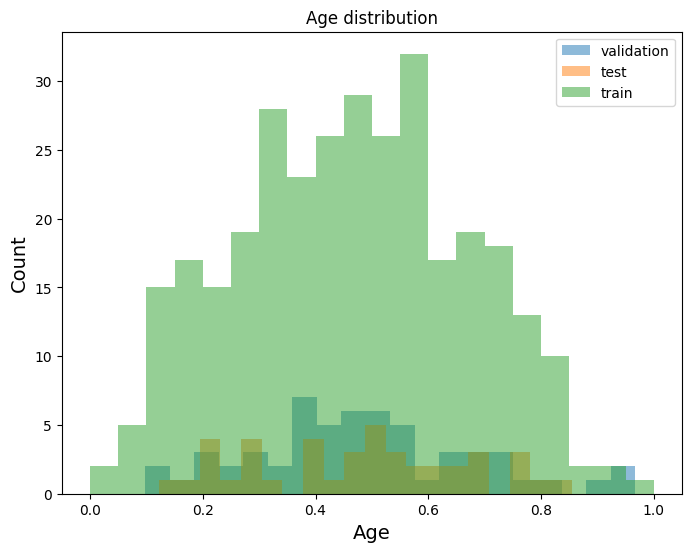

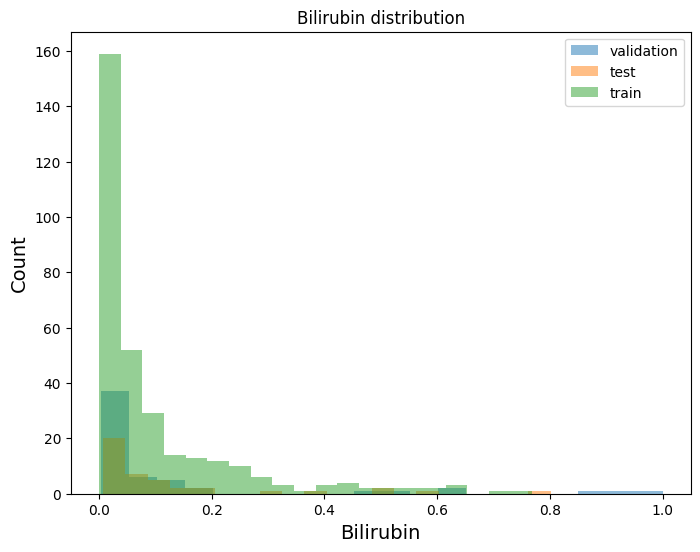

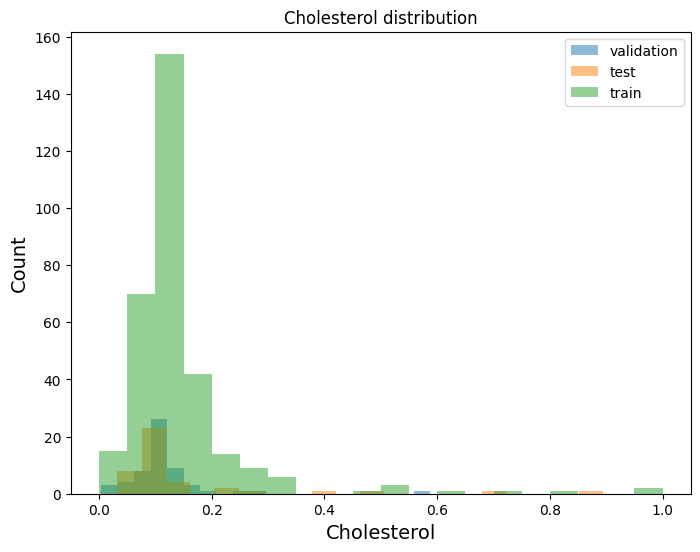

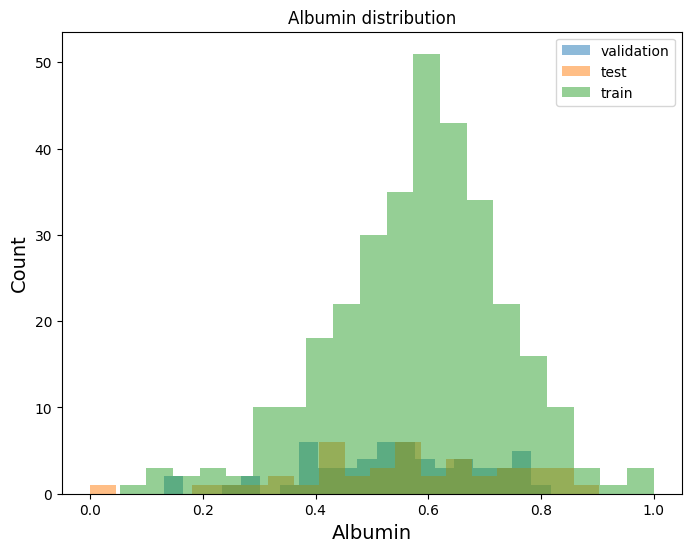

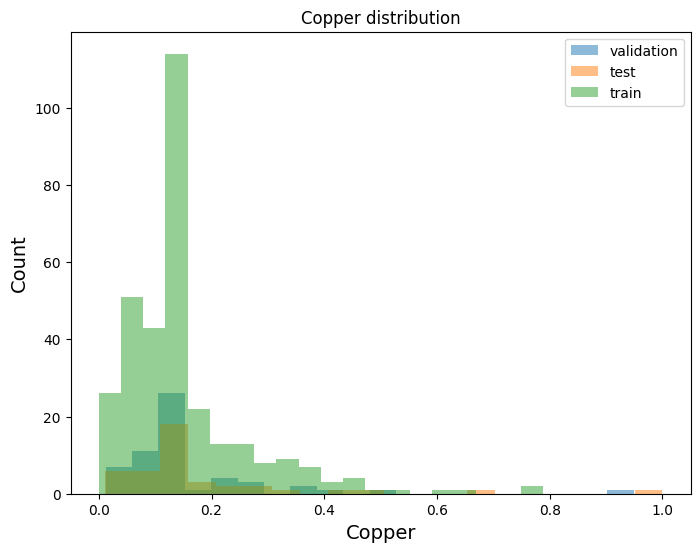

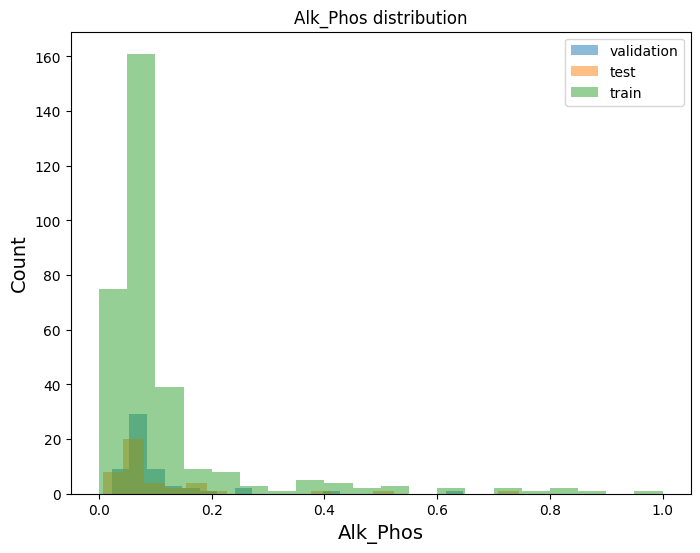

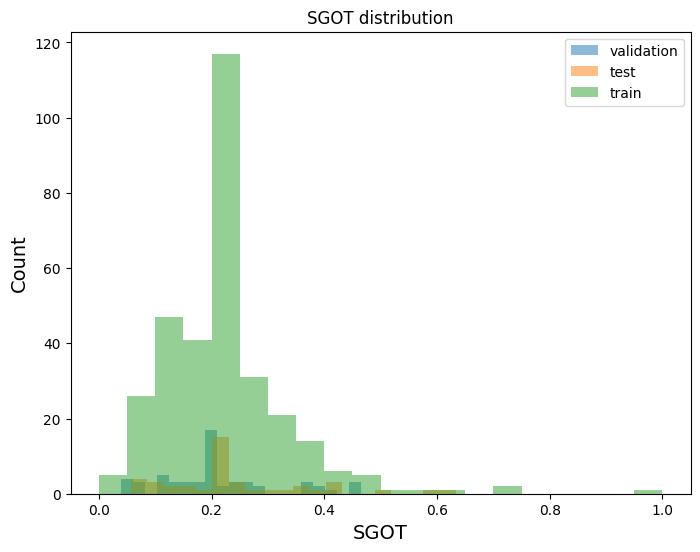

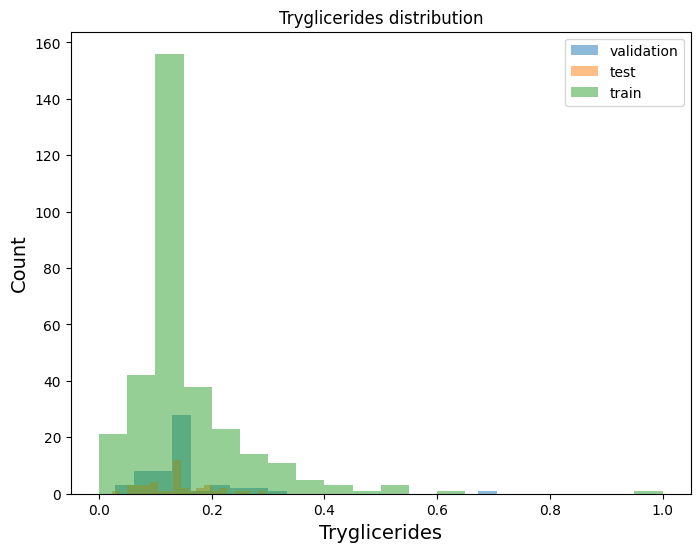

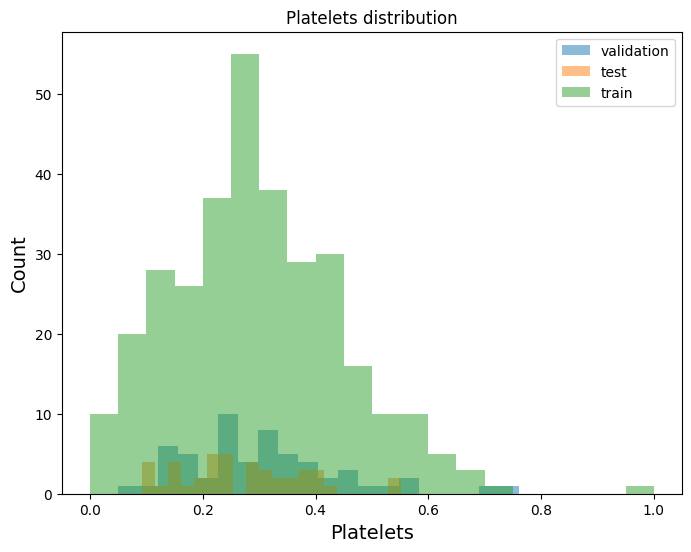

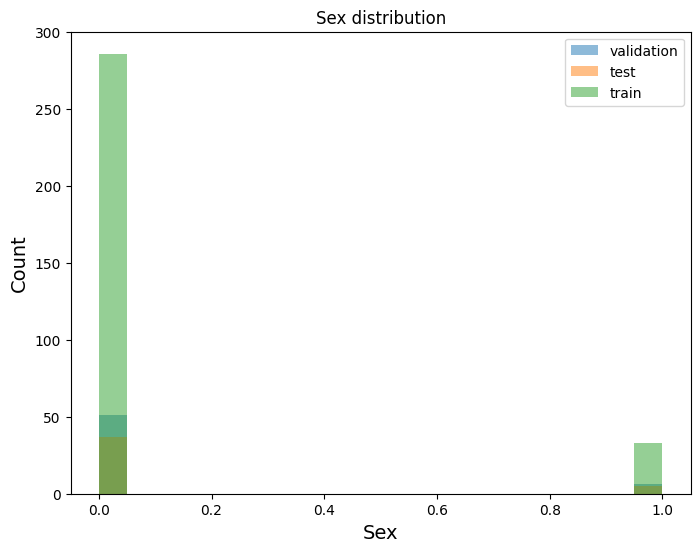

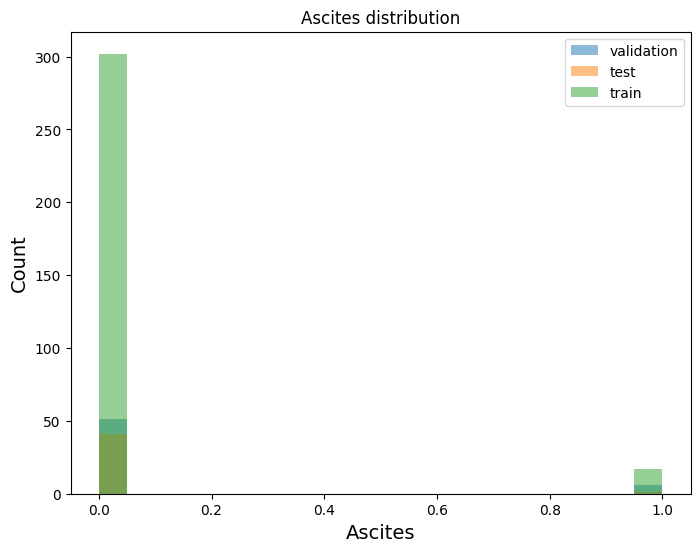

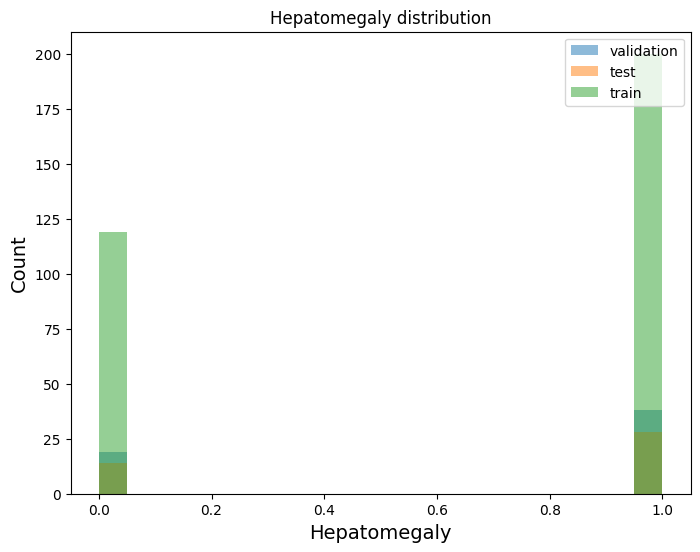

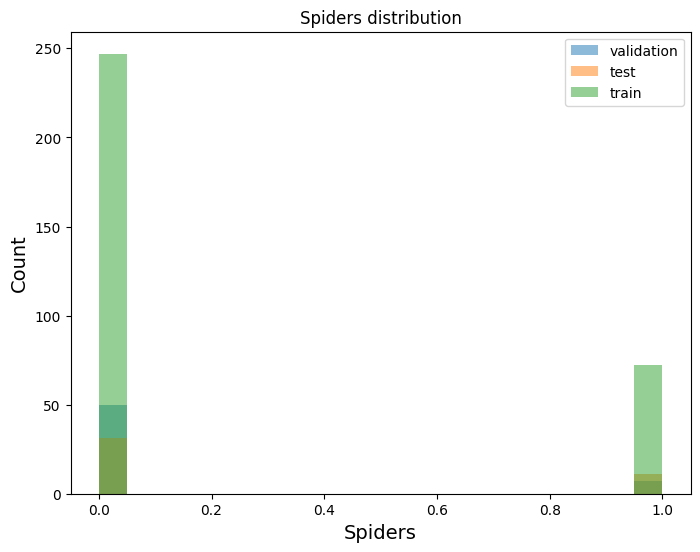

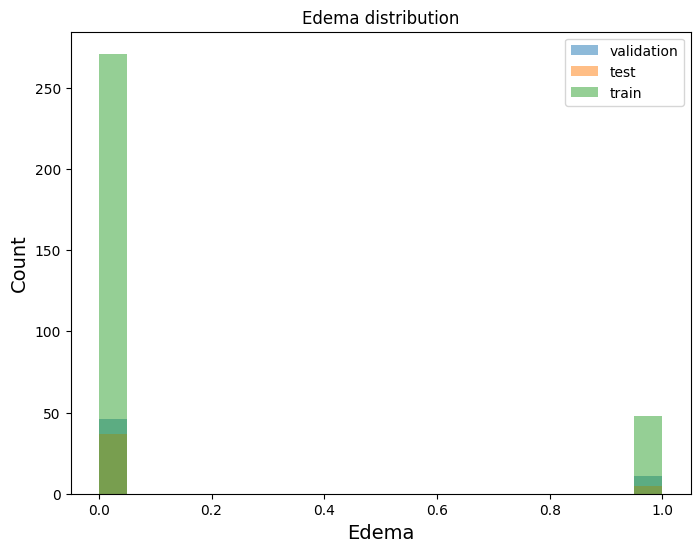

In [29]:
# Looking the data for test, training and validation set
X_test_plot = X_test[
    [
        'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Sex', 'Ascites',
    'Hepatomegaly', 'Spiders', 'Edema',
    ]
]

X_val_plot = X_val[
    [
        'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Sex', 'Ascites',
    'Hepatomegaly', 'Spiders', 'Edema',
    ]
]

X_train_plot = X_train[
    [
        'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Sex', 'Ascites',
    'Hepatomegaly', 'Spiders', 'Edema',
    ]
]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
    plt.figure(figsize=(8, 6))
    plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
    plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
    plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
    plt.xlabel(c, size=14)
    plt.ylabel("Count", size=14)
    plt.legend(loc="upper right")
    plt.title("{} distribution".format(c))
    plt.show()

**6. Do the training and test sets have the same data?**

Based on the histograms I have generated, it appears that the training and test sets do not have identical distributions for all features, but they are reasonably similar. For instance, the 'Age' distribution in the test set shows some minor discrepancies compared to the training set, likely due to the smaller sample size or random variation in the split.

The features 'Bilirubin', 'Cholesterol', 'Albumin', 'Tryglicerides', and 'Sex' show very similar distributions across the training and test sets, suggesting that the data split was well-balanced for these variables.

However, 'Copper', 'Alk_Phos', and to a lesser extent 'SGOT', and 'Platelets' show some differences in distribution between the training and test sets. This could potentially affect the model's ability to generalize from the training set to the test set.

In summary, while the training and test sets do not have perfectly matching data distributions, they are similar enough for most features that I would expect the model to generalize well. The minor differences observed will require careful consideration and may necessitate adjustments such as stratified sampling or further shuffling of the data to achieve better alignment.

In [30]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [31]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [32]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 0.16
Coefficient of determination: 0.35
R^2 score on tarining set = 0.34617039999154064


In [33]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("R^2 score on test set =", r2)

Mean squared error: 0.16
Coefficient of determination: 0.30
R^2 score on test set = 0.300629028369791


In [34]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)
print("R^2 score on validation set =", r2_val)

Mean squared error: 0.21
Coefficient of determination: 0.07
R^2 score on validation set = 0.06883189620634256


In [35]:
# Understanding the important features
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())